In [76]:
from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from snapml import DecisionTreeClassifier
import time

ModuleNotFoundError: No module named 'snapml'

In [4]:
data = pd.read_csv('creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
n_replicas = 10
big_data = pd.DataFrame(np.repeat(data.values, n_replicas, axis=0), columns=data.columns)

print(str(len(big_data)) + " observations in the inflated credit card fraud dataset.")
print(str(len(big_data.columns)) + " variables in the dataset.")

big_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


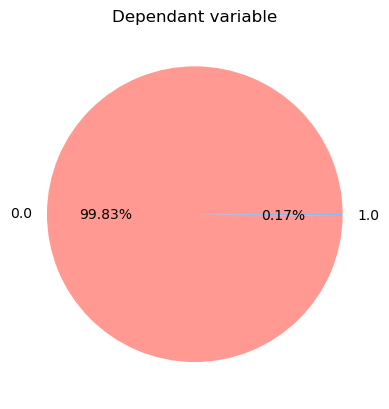

In [32]:
labels = big_data.Class.unique()

sizes = big_data.Class.value_counts().values

fig, ax = plt.subplots()
colors = ['#ff9991','#64b3ff','#98af19','#ffcc99']
ax.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors)
ax.set_title('Dependant variable')
plt.show()

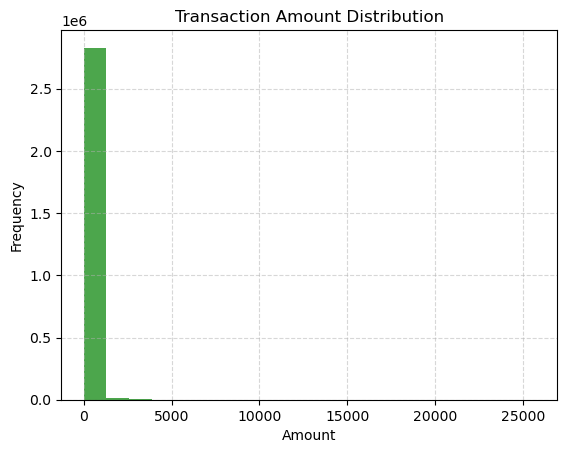

Min amount value  0.0
Max amount value  25691.16
90% of the transactions have an amount less or equal than  203.0


In [40]:
plt.hist(big_data.Amount.values, bins=20, histtype='bar', facecolor='g', alpha=0.7)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Min amount value ", np.min(big_data.Amount.values))
print("Max amount value ", np.max(big_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(data.Amount.values, 90))


In [58]:
big_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_data.iloc[:, 1:30])
data_matrix = big_data.values


X = data_matrix[:, 1:30]
y = data_matrix[:, 30]
X = normalize(X, norm="l1")
print('X.shape=', X.shape, 'y.shape=', y.shape)


X.shape= (2848070, 29) y.shape= (2848070,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


In [67]:
weight_train = compute_sample_weight('balanced', y_train)

sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=weight_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  55.61520


In [75]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45)


t0 = time.time()
snapml_dt.fit(X_train, y_train)  
snapml_time = time.time() - t0

print("Training time (s): {0:.5f}".format(snapml_time))

[Snap ML] Training time (s): 47.11283


In [78]:

training_speedup = sklearn_time/snapml_time
print('Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_pred = snapml_dt.predict_proba(X_test)[:,1]
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 1.18x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.748


In [84]:

training_speedup = sklearn_time/snapml_time
print('Snap ML / Scikit-Learn  speedup : {0:.2f}x '.format(training_speedup))

acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print(" scikit ROC-AUC score:   {0:.3f}".format(acc_sklearn))

acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("snap ROC-AUC score:   {0:.3f}".format(acc_snapml))

Snap ML / Scikit-Learn  speedup : 1.18x 
 scikit ROC-AUC score:   0.966
snap ROC-AUC score:   0.748
